#Tratativas Iniciais

**Importando bibliotecas e datasets**

In [1]:
!pip install dtype_diet
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=decc4a7000bbbe051a1f3356ed980a27ad0b84e26fb13dfbfbe1365c2c452702
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [2]:
from dtype_diet import report_on_dataframe, optimize_dtypes
from summarytools import dfSummary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/PedroReste/repository_for_studies/main/churn_prediction_models/ecommerce_dataset_sem_tratamento.csv'
df = pd.read_csv(url, sep=';')

**Otimizando os tipos do dataset**

Vou utilizar a biblioteca **dtype diet** para otimizar os tipos de cada variável para ficar mais rápido processar os dados.
Para essa base de dados não é tão necessário por conta de ser pequena, mas se estive utilizando para base de dados gigantes, isso seria uma ótima pedida, economizando processamento, tempo e dinheiro.

In [4]:
optimized_df = report_on_dataframe(df, unit="MB")
df_optimized = optimize_dtypes(df, optimized_df)

print(f'Original df memory: {df.memory_usage(deep=True).sum()/1024/1014} MB')
print(f'Propsed df memory: {df_optimized.memory_usage(deep=True).sum()/1024/1014} MB')

Original df memory: 2.4223671335675543 MB
Propsed df memory: 0.17028784516765286 MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int32   
 1   Churn                        5630 non-null   int8    
 2   Tenure                       5366 non-null   float16 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   int8    
 5   WarehouseToHome              5379 non-null   float16 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float16 
 9   NumberOfDeviceRegistered     5630 non-null   int8    
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int8    
 12  MaritalStatus                5630 non-null   category
 13  Num

In [7]:
df = df_optimized

#Análise Descretiva

In [8]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [9]:
#Sumário geral descretivas da base
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int32],Mean (sd) : 52815.5 (1625.4)min < med < max:50001.0 < 52815.5 < 55630.0IQR (CV) : 2814.5 (32.5),"5,630 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Churn[int8],Mean (sd) : 0.2 (0.4)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.4),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
3,Tenure[float16],Mean (sd) : 10.2 (8.6)min < med < max:0.0 < 9.0 < 61.0IQR (CV) : 14.0 (1.2),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOElEQVR4nO3czW7aQBSG4TMloQNUNogWdmzZZcGSi+jF9iLYch9IJjLCNQEhd1OqSPkB23Hjb/Q+68wki5dYxsfjiqIwoO2+fPYfANzi7toPOOd6ZtatuP+xKIq84lrgn3dDdc71xuPxzyiKRlU23+12j865X8SKuq79R+1GUTRaLpd5HMeHMhunaepXq9UoSZKumREqarl66Tczi+P4MJlMflfYv1dhDfACN1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQcNPr0lWdz+d7M4ucc1W34KQVmFmDoWZZdn86nR5ms1mn0+mUOrzigpNWcNFYqMfj8c57318sFofpdPpYdj0nreC5Ri/9ZmaDwaDqKStmnLSCv7iZggRChQRChQRChQRChQRChQRChQRChQRChYTGn0zVUXOohYGWgLQ21LpDLQy0hKW1odYZamGgJTytDfWixlALAy0B4WYKEggVEggVEggVEggVEggVElr/9VRVvKodliBD5VXt8AQZKq9qhyfIUC94VTsc3ExBAqFCQtCX/jqYhW0XQn0Fs7DtQ6ivYBa2fQj1HczCtgc3U5BAqJBAqJBAqJBAqJBAqJDA11MN4KnWxyPUD8ZTrWbcFGqapr7sxvv93puZZVnmN5tN/3+u/8zfvd1uv3nv+/P53A2Hw6cya/M8/7per38kSfLdObcrszYAT0VRvPnB/gPF+BQZ3sJuZAAAAABJRU5ErkJggg=="">",264(4.7%)
4,PreferredLoginDevice[category],1. Mobile Phone2. Computer3. Phone,"2,765 (49.1%)1,634 (29.0%)1,231 (21.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQYraABiG4T9Fhs4mQQQP4yF62B4itxExi84wm3TRVXd1Cl/yO89zAX/kRYn4Deu6FiR82/oAvo6hql6r6mXrQxr5WNf1besjOjqcTqcf4zgetz6ki2VZbsMw/BTc4w7jOB4vl8vbNE3vWx+zd/f7/fs8z8fr9fpSVWJ70KGqapqm9/P5/GvrY5p43fqArjwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiPmUPXnf1pbH9KB9+n/HJZluc3zfCz/0/ony7Lcqupj6zs6skF4nA3CJw2mfKR0/WTz6dJQy3WVhVNP7dZVFk59dV1XeXJuyI+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ihpt67qdCt/a7musnDqyQaBGOsqYjwgELOnr1FfjU9uN1M+87znt4spn3ne17CnKV+bn174HA8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZxZRv69cnYzdTPvO852eDQIwpHzG/AUq8o0re0pziAAAAAElFTkSuQmCC"

----------------------------
**Essa biblioteca ainda está sendo adaptada para o Python, mas já ajuda para olhar estatística descretivas gerais.**

Característica interessantes que esse sumário já proporciona:

A base de dados contem 5.630 amostras e 20 variáveis para cada, e existem algumas dessas que tem dados faltantes.
- O ID por usuário nessa base é único para todas as linhas, quer dizer que não temos usuários repetidos e não está faltando em nenhuma linha.
- Cerca de 71% dos usuários preferem comprar por celular.
	- Considerando que precisamos ajustar e agrupar o "mobile phone" e "phone" no mesmo padrão.
- Majoritariamente é preferível pagar com o cartões de crédito e débito.
  - As outras formas existem podemos entrar depois para saber o que significam.
- 60,1% dos usuários são homens.
- Notebook e Acessórios, Celulares e Moda são a principais categorias nessa base.
- O usários são majoritariamente casados e 1/3 solteiros. Aqui é possível agrupar solterios e divorciados caso não tenham tanta distinção.
--------------------
**Métricas que faltaram observar**
- Churn
- Tenure
- CityTier
- WarehouseToHome
- HoursSpendOnApp
- NumberOfDeviceRegistered
- Satisfaction Score
- NumberOfAddress
- Complain
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
-----------------
**Dados faltantes por variável**
- Tenure: 4,7%
- WarehouseToHome: 4,5%
- OrderAmountHikeFromlastYear: 4,7%
- CouponUsed: 4,5%
- OrderCount: 4,6%
- DaySinceLastOrder: 5,5%
-----------------

**SE REMOVESSEMOS TODAS AS LINHAS QUE TEM UM VALOR VAZIO?**

In [10]:
df_sem_na = df.dropna()
print(f"Quantidade de linhas da base inteira: {df.shape[0]}")
print(f"Quantidade de linhas da base sem dados faltantes: {df_sem_na.shape[0]}")
print(f"Representa {round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% da base original")
print(f"Perderiamos {100 - round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% das observações da base original")

Quantidade de linhas da base inteira: 5630
Quantidade de linhas da base sem dados faltantes: 3774
Representa 67.0% da base original
Perderiamos 33.0% das observações da base original


Talvez não seja o ideal removermos essas linhas todas para observar os dados, ainda mais porque estamos falando de pedidos realizados de uma base e-commerce.

Podemos pensar posteriormente uma estratégia para repor esses dados, porque temos métricas que são interessante termos, ainda mais no contexto de uma base pensada para modelos de churn.

**OUTRAS ANÁLISES DESCRETIVAS**

Text(0.5, 0, '')

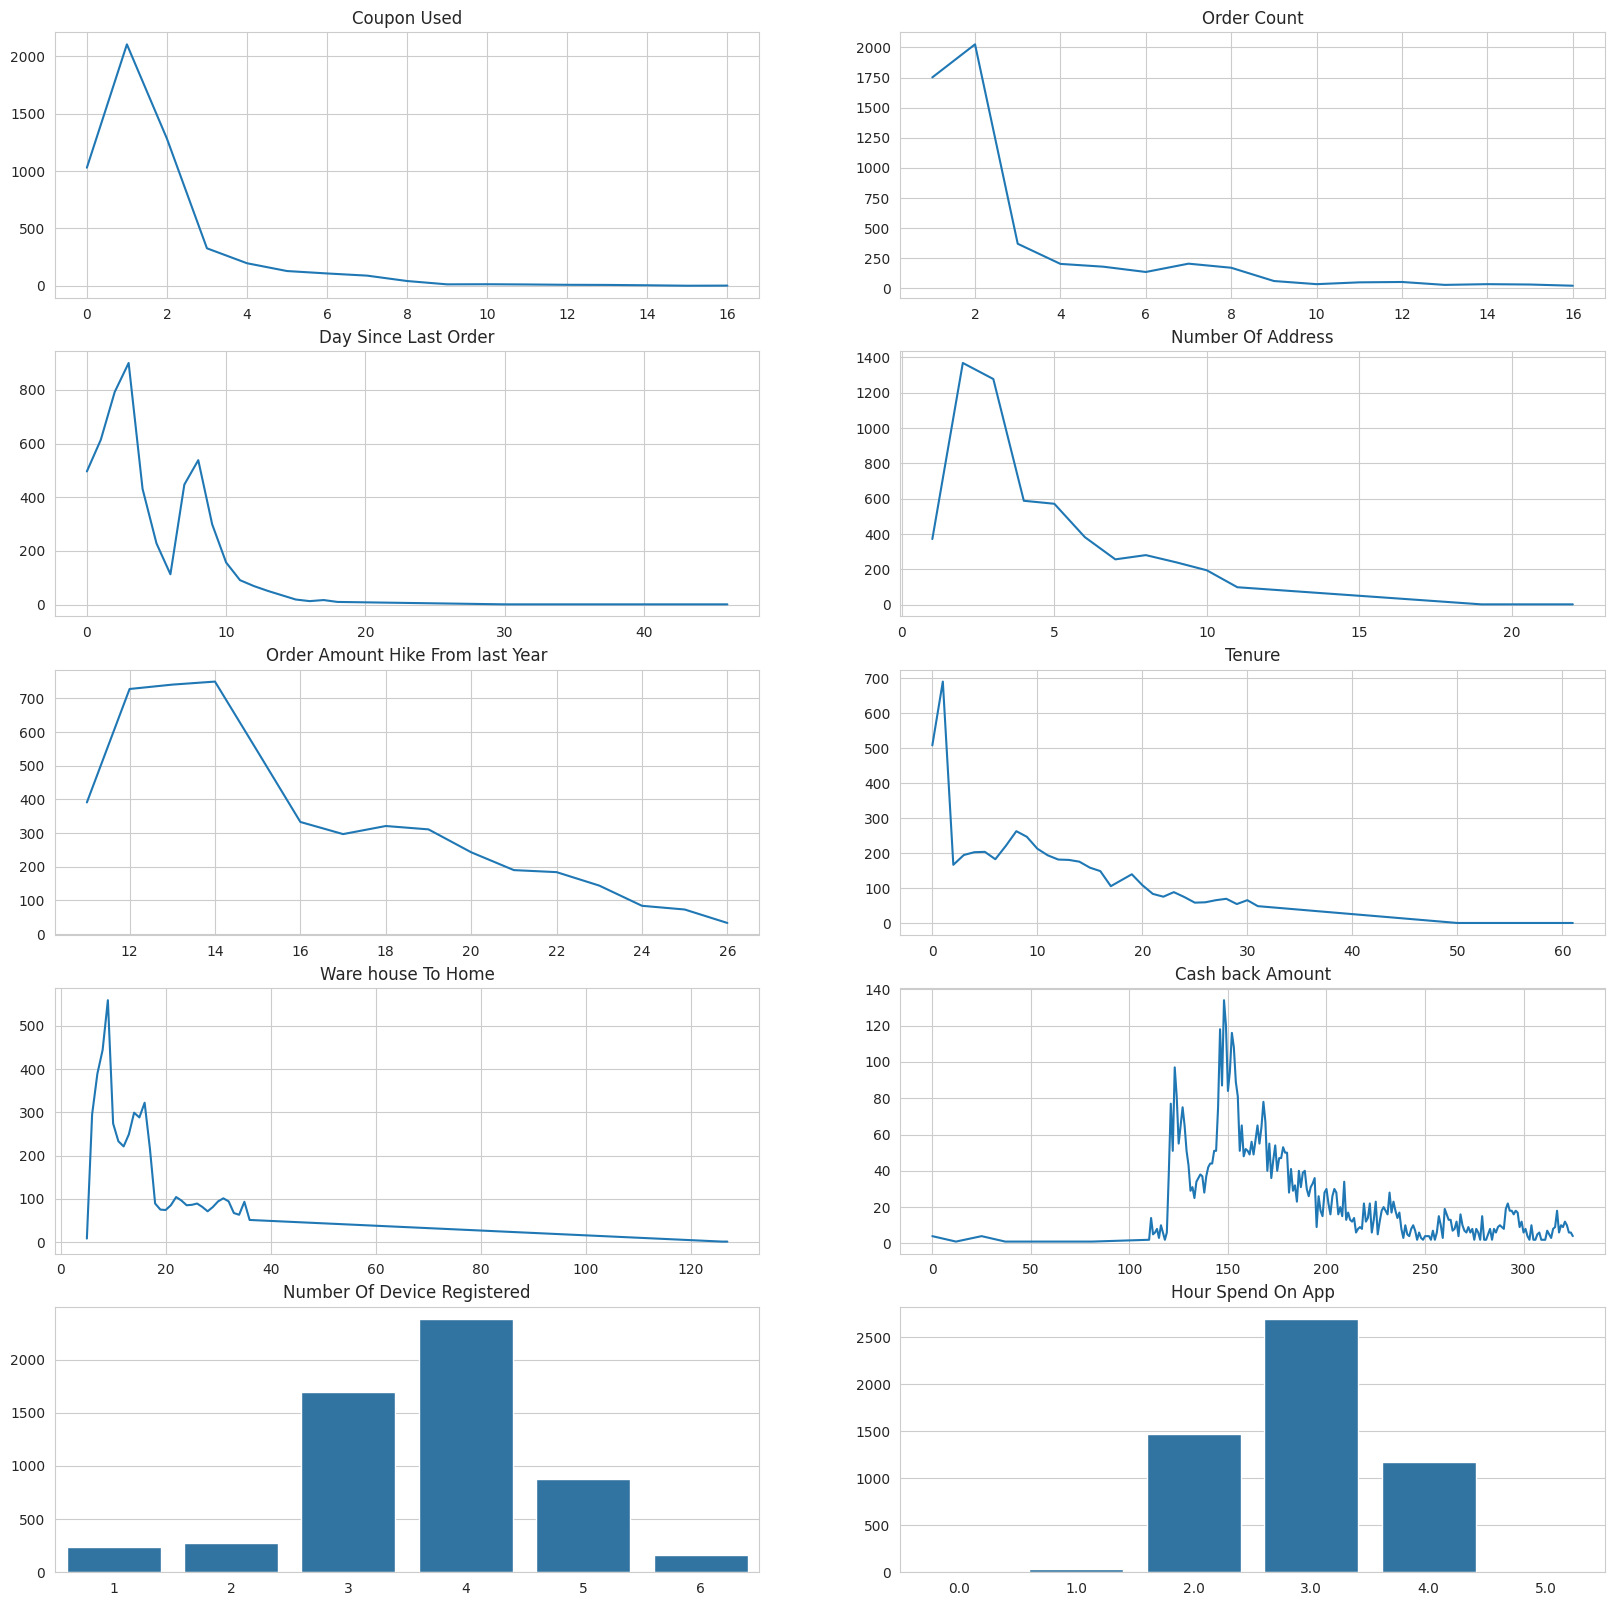

In [48]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

var = df['CouponUsed'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0, 0])
axes[0, 0].set_title("Coupon Used")
axes[0, 0].set_xlabel("")

var = df['OrderCount'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0, 1])
axes[0, 1].set_title("Order Count")
axes[0, 1].set_xlabel("")

var = df['DaySinceLastOrder'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[1, 0])
axes[1, 0].set_title("Day Since Last Order")
axes[1, 0].set_xlabel("")

var = df['NumberOfAddress'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[1, 1])
axes[1, 1].set_title("Number Of Address")
axes[1, 1].set_xlabel("")

var = df['OrderAmountHikeFromlastYear'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("Order Amount Hike From last Year")
axes[2, 0].set_xlabel("")

var = df['Tenure'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[2, 1])
axes[2, 1].set_title("Tenure")
axes[2, 1].set_xlabel("")

var = df['WarehouseToHome'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[3, 0])
axes[3, 0].set_title("Ware house To Home")
axes[3, 0].set_xlabel("")

var = df['CashbackAmount'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[3, 1])
axes[3, 1].set_title("Cash back Amount")
axes[3, 1].set_xlabel("")

var = df['NumberOfDeviceRegistered'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 0])
axes[4, 0].set_title("Number Of Device Registered")
axes[4, 0].set_xlabel("")

var = df['HourSpendOnApp'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 1])
axes[4, 1].set_title("Hour Spend On App")
axes[4, 1].set_xlabel("")

Text(0.5, 0, '')

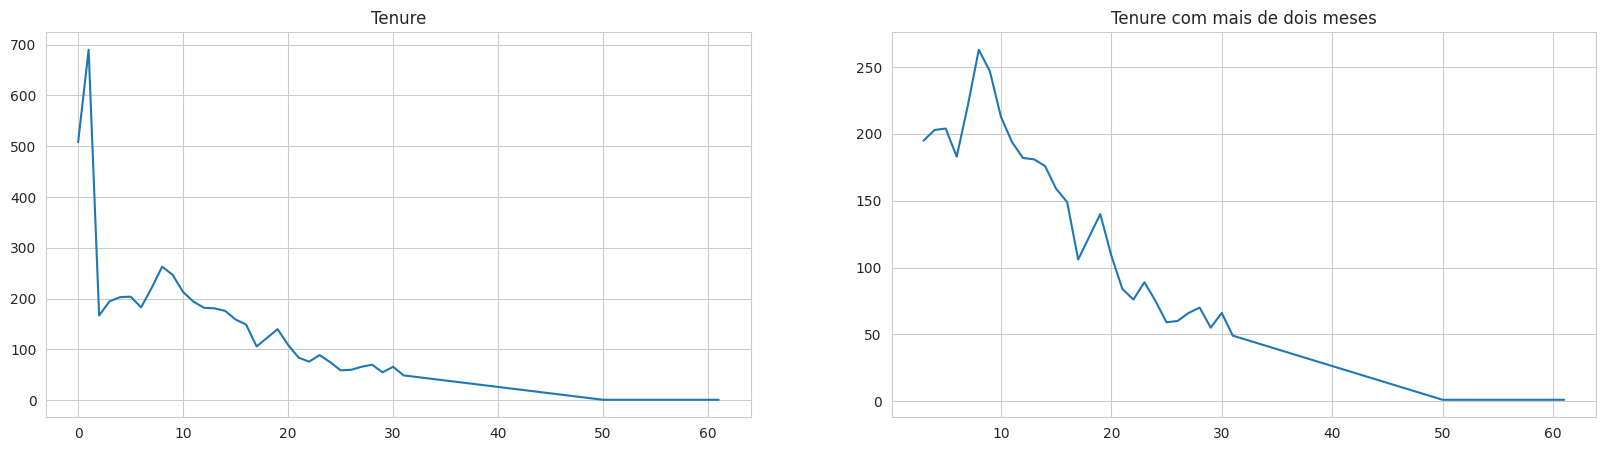

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

var = df['Tenure'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0])
axes[0].set_title("Tenure")
axes[0].set_xlabel("")

#Novo gráfico sem o 1° e o 2° mês
var = df['Tenure'].sort_values().value_counts(sort=False)
var = var[var.index > 2]
sns.lineplot(x= var.index, y=var.values, ax=axes[1])
axes[1].set_title("Tenure com mais de dois meses")
axes[1].set_xlabel("")

Text(0.5, 0, '')

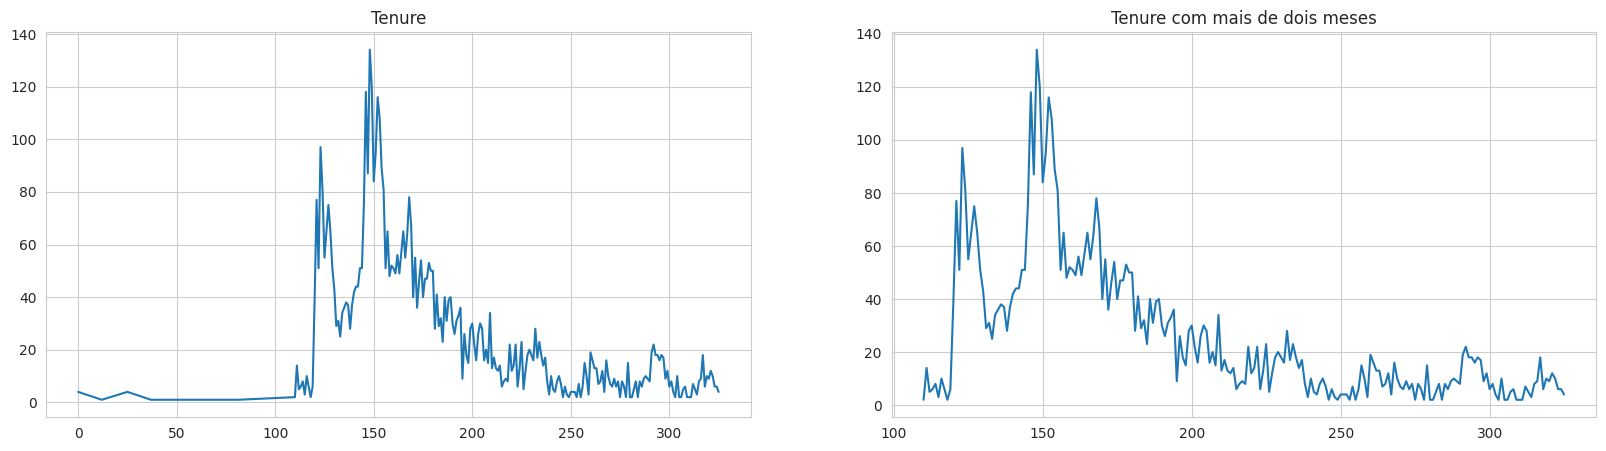

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

var = df['CashbackAmount'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0])
axes[0].set_title("Tenure")
axes[0].set_xlabel("")

#Novo gráfico sem o 1° e o 2° mês
var = df['CashbackAmount'].sort_values().value_counts(sort=False)
var = var[var.index > 100]
sns.lineplot(x= var.index, y=var.values, ax=axes[1])
axes[1].set_title("Tenure com mais de dois meses")
axes[1].set_xlabel("")

Text(0.5, 0, '')

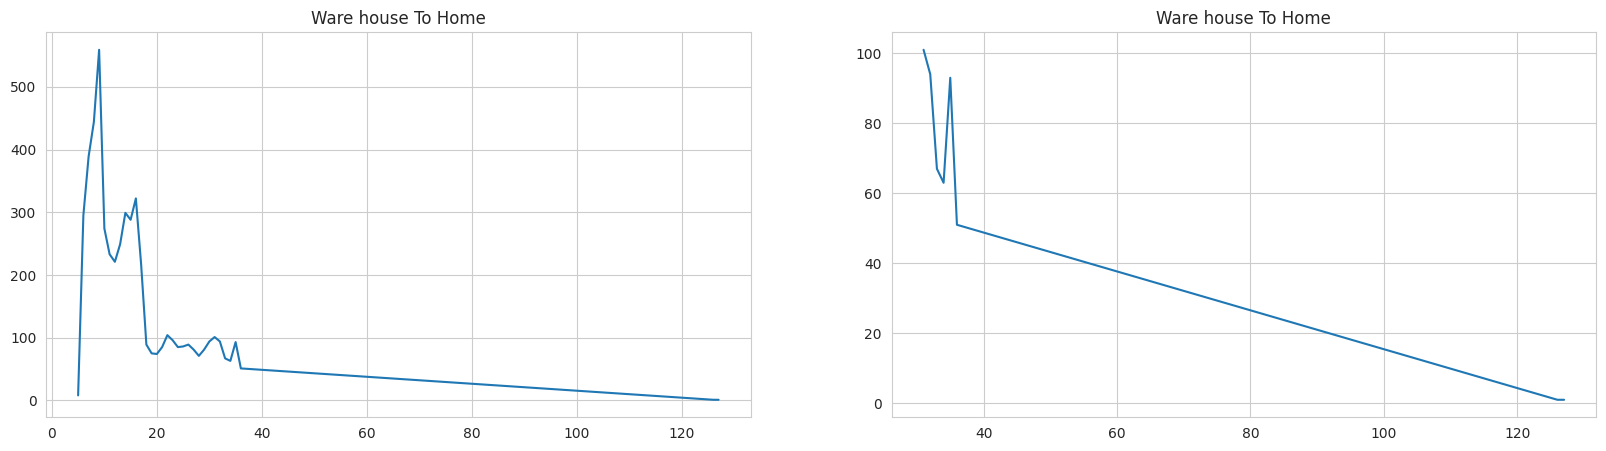

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

var = df['WarehouseToHome'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0])
axes[0].set_title("Ware house To Home")
axes[0].set_xlabel("")

#Novo gráfico sem o 1° e o 2° mês
var = df['WarehouseToHome'].sort_values().value_counts(sort=False)
var = var[var.index > 30]
sns.lineplot(x= var.index, y=var.values, ax=axes[1])
axes[1].set_title("Ware house To Home")
axes[1].set_xlabel("")

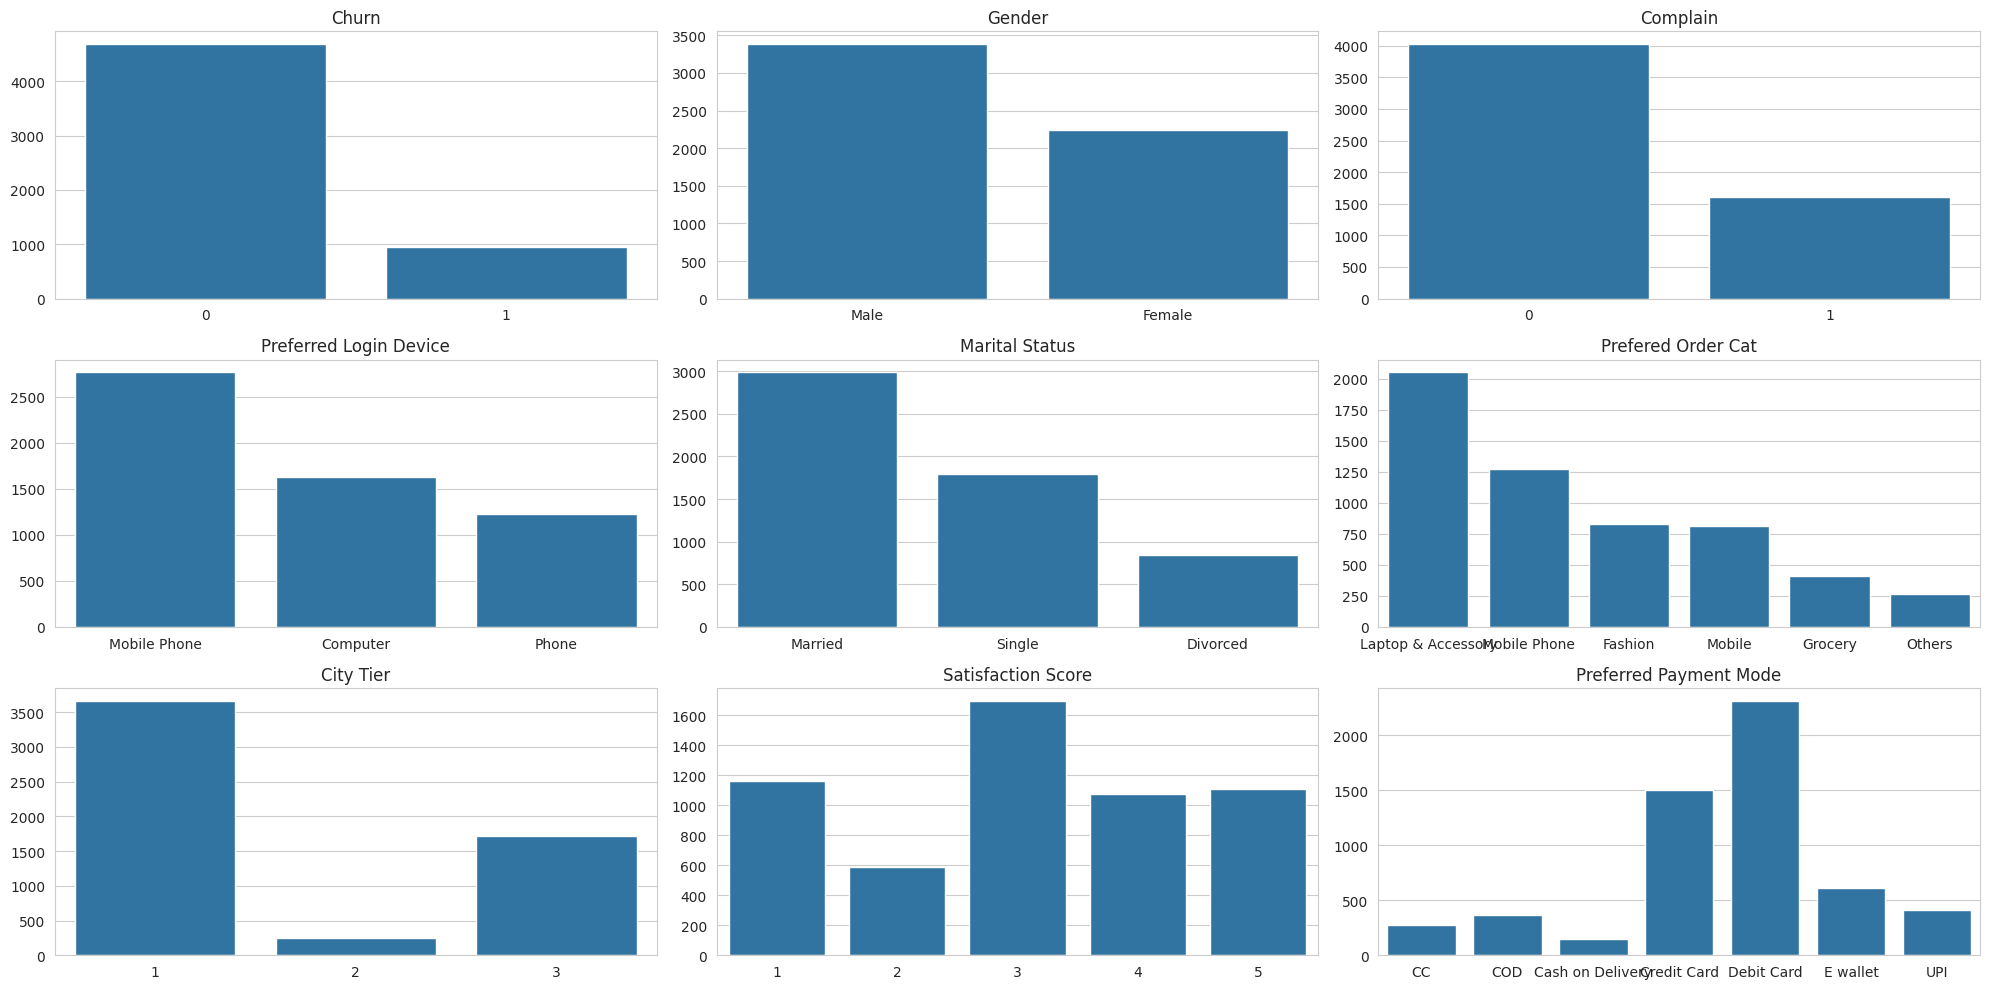

In [15]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

var = df['Churn'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 0])
axes[0, 0].set_title("Churn")
axes[0, 0].set_xlabel("")

var = df['Gender'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 1])
axes[0, 1].set_title("Gender")
axes[0, 1].set_xlabel("")

var = df['Complain'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 2])
axes[0, 2].set_title("Complain")
axes[0, 2].set_xlabel("")

var = df['PreferredLoginDevice'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 0])
axes[1, 0].set_title("Preferred Login Device")
axes[1, 0].set_xlabel("")

var = df['MaritalStatus'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 1])
axes[1, 1].set_title("Marital Status")
axes[1, 1].set_xlabel("")

var = df['PreferedOrderCat'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 2])
axes[1, 2].set_title("Prefered Order Cat")
axes[1, 2].set_xlabel("")

var = df['CityTier'].value_counts()
sns.barplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("City Tier")
axes[2, 0].set_xlabel("")

var = df['SatisfactionScore'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[2, 1])
axes[2, 1].set_title("Satisfaction Score")
axes[2, 1].set_xlabel("")

var = df['PreferredPaymentMode'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[2, 2])
axes[2, 2].set_title("Preferred Payment Mode")
axes[2, 2].set_xlabel("")


plt.tight_layout()

In [16]:
print(f'Essa base possui {df.shape[0]} observações, sendo que {df.Churn.value_counts()[1]} são churners, representando {((df.Churn.value_counts()[1]/df.shape[0]) * 100).round(1)}% da base')

Essa base possui 5630 observações, sendo que 948 são churners, representando 16.8% da base


A maior parte do usuários estão no 1° e 2° mês com a empresa, talvez seja interessante verificar se há diferença desse conjunto com os usuários que estão a mais tempo

City Tier seja interessante segmentar pelos níveis para verificar se as bases são muito distintas

Hour Spend On App seja interessante segmentar pelos níveis para verificar se as bases são muito distintas